# 🍕 Pizza Sales Data Analysis with Graphs

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
orders = pd.read_csv("orders.csv")
order_details = pd.read_csv("order_details.csv")
pizzas = pd.read_csv("pizzas.csv")
pizza_types = pd.read_csv("pizza_types.csv", encoding='ISO-8859-1')


In [6]:
# Merge data
df = order_details.merge(pizzas, on='pizza_id', how='left')
df = df.merge(pizza_types, on='pizza_type_id', how='left')
df = df.merge(orders, on='order_id', how='left')
df['date'] = pd.to_datetime(df['date'])
df['total_price'] = df['quantity'] * df['price']

In [7]:
# Total revenue and quantity
total_revenue = df['total_price'].sum()
total_quantity = df['quantity'].sum()

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Pizzas Sold: {total_quantity}")

Total Revenue: $817,860.05
Total Pizzas Sold: 49574


## 📊 Top 5 Best-Selling Pizzas

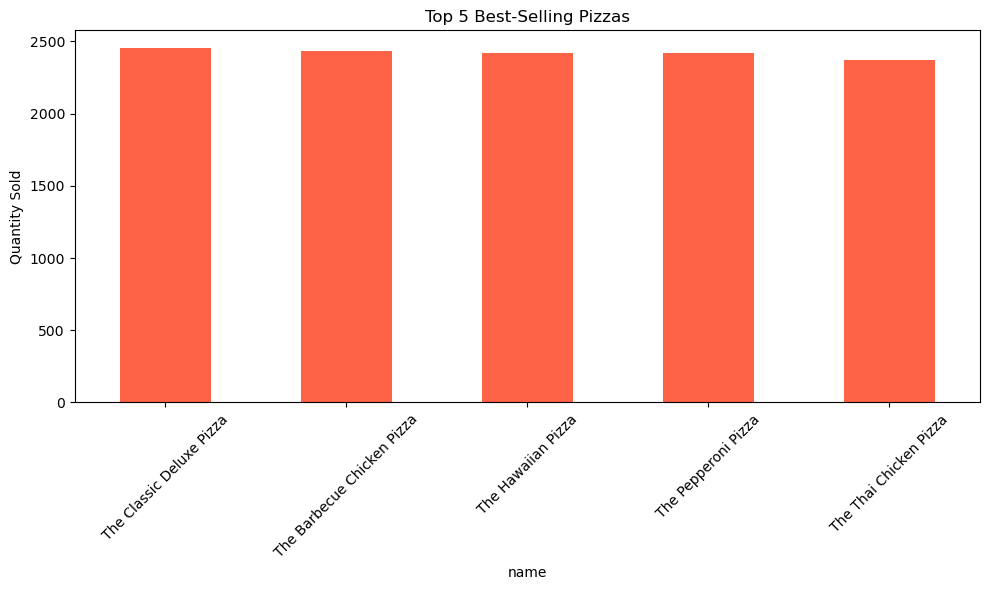

In [8]:
# Top 5 pizzas
top_pizzas = df.groupby('name')['quantity'].sum().sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(10, 6))
top_pizzas.plot(kind='bar', color='tomato')
plt.title('Top 5 Best-Selling Pizzas')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()